# 💻 Código Python para simulação de fermentações em contínuo 🖱️
### <i>Vazão de entrada e vazão de saída do tanque são diferentes</i>
 * Cinética analisada: <i>Monod</i>;

#### 🎯 Pontos- chave do algoritmo:
 * Avaliar a cinética do evento;
 * Avaliar casos nos quais o biorreator enche e esvazia.

#### 📚 * IMPORTAÇÃO DAS BIBLIOTECAS NECESSÁRIAS AO PROGRAMA * #

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#### 🍔 * VALORES NUMÉRICOS (CONSTANTES) DE ALIMENTAÇÃO AOS MODELOS CINÉTICOS DEDUZIDOS E IMPLEMENTADOS * #

In [ ]:
## * Cinética de Monod :
# -----------------------------------------------------------------------------------------------------------------------------#
mi_max = 0.35 # Taxa específica de crescimento microbiana máxima (h-1)
Ks = 3.1 # Constante de saturação (g/L)
# -----------------------------------------------------------------------------------------------------------------------------#

## * Balanço de massa geral * :
# -----------------------------------------------------------------------------------------------------------------------------#
Kd = 0.01 # constante de morte celular (h-1)
Yxs = 0.3 # coeficiente de rendimento célula / substrato (gx/gs)
alfa = 0.08 # constante de   (produto)
beta = 0.01 # constante de   (produto)
Cx0 = 0.25 # Concentração inicial de células - t0 da fermentação (g/L)
Cs0 = 150 # Concentração inicial de substrato - t0 da fermentação (g/L)
Cp0 = 0 # Concentração inicial de produto - t0 da fermentação (g/L)
tf = 40 # Tempo total de fermentação (h)
# -----------------------------------------------------------------------------------------------------------------------------#

## * Balanço de massa específico para a operação em contínuo * :
# -----------------------------------------------------------------------------------------------------------------------------#
V0 = 2 # Volume inicial do tanque (L)
# -----------------------------------------------------------------------------------------------------------------------------#

#### 🧮 * DEFINIÇÃO E INTEGRAÇÃO NUMÉRICA DO MODELO (SISTEMA DE EDO's) *

In [ ]:
Q0 = float(input("Vazão de alimentação inicial (L/h): "))
Qf = float(input("Vazão de alimentação final (L/h): "))

# * Condicional para avaliar o caso simulado *:
if (Q0 > Qf):
    print("\n" + "🔋 VOCÊ ACABA DE ANALISAR UM PROCESSO DE ENCHIMENTO DO REATOR 🔋" + "\n")
else: 
    print("\n" + "🥛 VOCÊ ACABA DE ANALISAR UM PROCESSO DE ESVAZIAMENTO DO REATOR 🥛" + "\n")

# * Definição do modelo * #
def continuoEnchesvazia(C, t):
    Cx, Cs, Cp = C
    
    V = ((Q0 - Qf) * t) + V0 # Equação temporal para o cálculo de volume (deduzido por integração)
    
    mi = mi_max * (Cs/(Ks + Cs))
    dCxdt = (Q0 * Cx0 + Cx * ((V * (mi - Kd)) - Q0)) / V
    dCsdt = ((Q0 *(Cs0 - Cs)) / V) - (1 / Yxs) * mi * Cx
    dCpdt = ((Q0 *(Cp0 - Cp)) / V) + Cx * ((alfa * mi) + beta)
    
    return(dCxdt, dCsdt, dCpdt)  

# * Vetores tempo e condição inicial para disparar a integração *:
t = np.arange(0, tf, 0.5)
cond_inicial = [Cx0, Cs0, Cp0]

# * Invocação da função para de fato integrar o sistema de EDO's *:
concent = odeint(continuoEnchesvazia, cond_inicial, t)
print(concent)

Vazão de alimentação inicial (L/h): 0.5
Vazão de alimentação final (L/h): 1.0

🥛 VOCÊ ACABA DE ANALISAR UM PROCESSO DE ESVAZIAMENTO DO REATOR 🥛

[[ 2.50000000e-01  1.50000000e+02  0.00000000e+00]
 [ 2.92243543e-01  1.49854958e+02  4.74991623e-03]
 [ 3.34553439e-01  1.49709689e+02  9.50732518e-03]
 [ 3.74391293e-01  1.49572907e+02  1.39868076e-02]
 [ 4.07820973e-01  1.49458127e+02  1.77457722e-02]
 [ 4.28719493e-01  1.49386373e+02  2.00957201e-02]
 [ 4.27231634e-01  1.49391481e+02  1.99284734e-02]
 [ 3.85747529e-01  1.49533915e+02  1.52638850e-02]
 [ 2.50000029e-01  1.50000000e+02  3.22699063e-09]
 [ 3.95557855e-01  1.49500234e+02  1.63662641e-02]
 [ 6.57193983e-01  1.48601917e+02  4.57849512e-02]
 [ 1.02674768e+00  1.47333064e+02  8.73392686e-02]
 [ 1.52541669e+00  1.45620891e+02  1.43414287e-01]
 [ 2.18339684e+00  1.43361712e+02  2.17408199e-01]
 [ 3.03932438e+00  1.40422854e+02  3.13670615e-01]
 [ 4.14136501e+00  1.36638913e+02  4.37626753e-01]
 [ 5.54893480e+00  1.31805836e+02  5.95

#### 📈 * PLOTAGEM GRÁFICA DAS SAÍDAS *

### * Perfil de variação temporal da concentração *

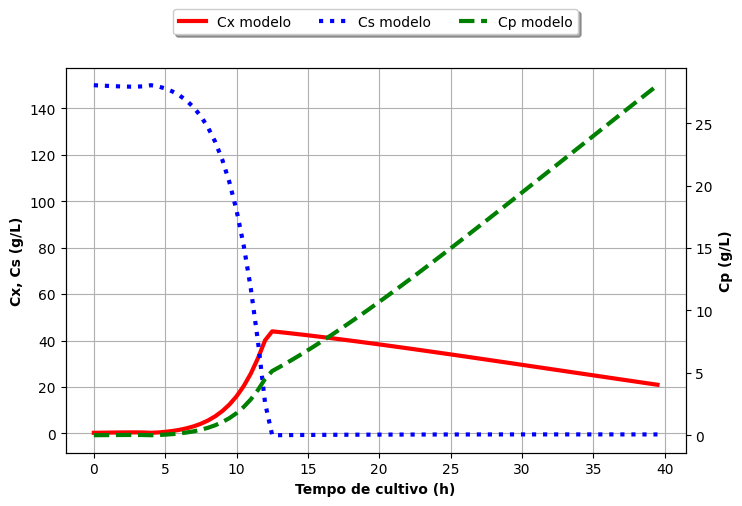

In [ ]:
# * Definição da função de impressão da figura:
def imprimir_perfil_concentracao (t_m, Cx_m, Cs_m, Cp_m):  
    f = plt.figure() 
    ax = f.add_subplot(111)                                              
    lns1 = ax.plot(t_m,Cx_m,'red',linewidth=3,label='Cx modelo')    
    lns2 = ax.plot(t_m,Cs_m,linestyle=":",color='blue',linewidth=3,label='Cs modelo')  
    ax2 = ax.twinx()
    lns3 = ax2.plot(t_m,Cp_m,linestyle="--",color='green',linewidth=3,label='Cp modelo')     
    ax.set_xlabel('Tempo de cultivo (h)',weight='bold')               
    ax.set_ylabel('Cx, Cs (g/L)', weight='bold')
    ax2.set_ylabel('Cp (g/L)', weight='bold') 
    lns = lns1+lns2+lns3
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.17),ncol=3, fancybox=True, shadow=True )                                              
    ax.grid(True)                                                  
    f.set_figheight(5)                                                 
    f.set_figwidth(8)                                                  
    f.patch.set_facecolor('white')                                     
    plt.style.use('default')  
imprimir_perfil_concentracao(t, concent[:,0], concent[:,1], concent[:,2])   

### * Perfil de variação temporal do volume * 

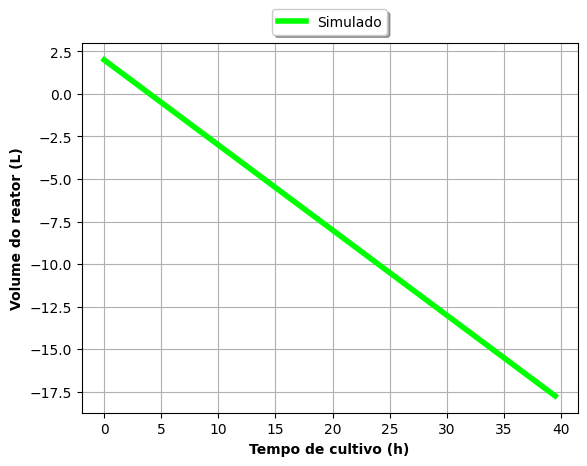

<Figure size 640x480 with 0 Axes>

In [ ]:
# * Cálculo do volume *:
V = ((Q0 - Qf) * t) + V0

# * Definição da função de impressão da figura:
def imprimir_volume (t_m, vol_m):                                             
    plt.plot(t_m,vol_m,'lime',linewidth=4, label='Simulado')     
    plt.xlabel('Tempo de cultivo (h)',weight='bold')               
    plt.ylabel('Volume do reator (L)', weight='bold') 
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11),ncol=2, fancybox=True, shadow=True)  
    plt.grid(True)
    plt.show()     
    plt.savefig("Batelada monod simulação variação mi com o tempo.png")
imprimir_volume(t, V)

### 🧫 * Perfil de variação temporal da velocidade de crescimento da cultura *

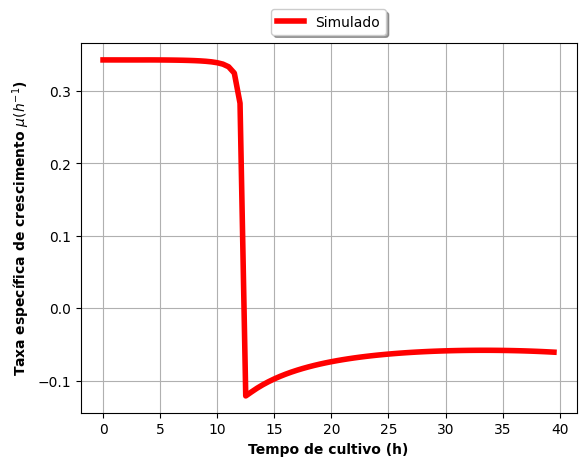

In [ ]:
# * Cálculo da taxa de crescimento*:
mi = mi_max * (concent[:,1]/(Ks + concent[:,1]))

# * Definição da função de impressão da figura:
def imprimir_velocidade_crescimento (t_m, mi_m):                                             
    plt.plot(t_m,mi_m,'red',linewidth=4, label = 'Simulado')     
    plt.xlabel('Tempo de cultivo (h)',weight='bold')               
    plt.ylabel('Taxa específica de crescimento $\mu(h^{-1}$)', weight='bold') 
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.11),ncol=2, fancybox=True, shadow=True)  
    plt.grid(True)
    plt.show()     
imprimir_velocidade_crescimento(t, mi)